In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

# 1) load data
vocab_size = 20000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# 2) pad
X_train = pad_sequences(X_train, maxlen=max_len)
X_test  = pad_sequences(X_test, maxlen=max_len)

# ----------------------------------------------------------------
# LSTM model
model_LSTM = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("training normal LSTM ...")
model_LSTM.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)
loss_LSTM, acc_LSTM = model_LSTM.evaluate(X_test, y_test, verbose=0)

# ----------------------------------------------------------------
# BiLSTM model
model_BiLSTM = Sequential([
    Embedding(vocab_size, 128, input_length=max_len),
    Bidirectional(LSTM(128)),
    Dense(1, activation='sigmoid')
])

model_BiLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("training BiLSTM ...")
model_BiLSTM.fit(X_train, y_train, epochs=1, batch_size=64, validation_split=0.2)
loss_BiLSTM, acc_BiLSTM = model_BiLSTM.evaluate(X_test, y_test, verbose=0)

# ----------------------------------------------------------------
print("\n\nRESULTS:")
print("LSTM    test accuracy    :", acc_LSTM)
print("Bi-LSTM test accuracy    :", acc_BiLSTM)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


c:\Users\Hrishita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


training normal LSTM ...
313/313 ━━━━━━━━━━━━━━━━━━━━ 124s 387ms/step - accuracy: 0.7551 - loss: 0.4922 - val_accuracy: 0.8318 - val_loss: 0.3994
training BiLSTM ...
313/313 ━━━━━━━━━━━━━━━━━━━━ 179s 558ms/step - accuracy: 0.7729 - loss: 0.4700 - val_accuracy: 0.8542 - val_loss: 0.3612


RESULTS:
LSTM    test accuracy    : 0.8191999793052673
Bi-LSTM test accuracy    : 0.8508399724960327


In [2]:
from sklearn.metrics import confusion_matrix
import numpy as np

# predicted probabilities → convert to class (0 or 1)
y_pred_LSTM = (model_LSTM.predict(X_test) > 0.5).astype("int32")
y_pred_BiLSTM = (model_BiLSTM.predict(X_test) > 0.5).astype("int32")

cm_LSTM = confusion_matrix(y_test, y_pred_LSTM)
cm_BiLSTM = confusion_matrix(y_test, y_pred_BiLSTM)

print("\nConfusion Matrix - LSTM\n")
print(cm_LSTM)

print("\nConfusion Matrix - BiLSTM\n")
print(cm_BiLSTM)

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step

Confusion Matrix - LSTM

[[10471  2029]
 [ 2491 10009]]

Confusion Matrix - BiLSTM

[[10167  2333]
 [ 1396 11104]]


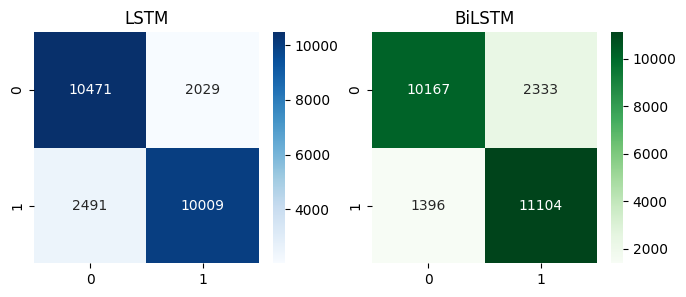

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.heatmap(cm_LSTM, annot=True, fmt="d", cmap="Blues")
plt.title("LSTM")

plt.subplot(1,2,2)
sns.heatmap(cm_BiLSTM, annot=True, fmt="d", cmap="Greens")
plt.title("BiLSTM")

plt.show()